In [2]:
from skimage import io
import numpy as np
import numpy.matlib
import random
import scipy.misc
import os
import imageio


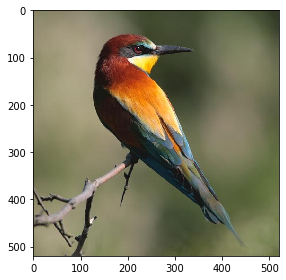

In [3]:
image = io.imread('img_test.png')
io.imshow(image)
io.show()

In [4]:
rows = image.shape[0]
cols = image.shape[1]
image = image/255
X = image.reshape(image.shape[0]*image.shape[1],3)

In [5]:
K = 16 #number of clusters
max_iters = 50 #number of times the k-mean should run

In [ ]:
def init_centroids(X,K):
    c = random.sample(list(X),K)
    return c

def closest_centroids(X,c):
    K = np.size(c,0)
    idx = np.zeros((np.size(X,0),1))
    arr = np.empty((np.size(X,0),1))
    for i in range(0,K):
        y = c[i]
        temp = np.ones((np.size(X,0),1))*y
        b = np.power(np.subtract(X,temp),2)
        a = np.sum(b,axis = 1)
        a = np.asarray(a)
        a.resize((np.size(X,0),1))
        #print(np.shape(a))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1)
    return idx

def compute_centroids(X,idx,K):
    n = np.size(X,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        ci = idx==i
        ci = ci.astype(int)
        total_number = sum(ci);
        ci.resize((np.size(X,0),1))
        total_matrix = np.matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(X,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids

def run_kMean(X,initial_centroids,max_iters):
    m = np.size(X,0)
    n = np.size(X,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    for i in range(1,max_iters):
        idx = closest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,K)
    return centroids,idx

In [9]:
initial_centroids = init_centroids(X,K)
centroids,idx = run_kMean(X,initial_centroids,max_iters)
#idx.resize((np.size(X,0),1))
print(np.shape(centroids))
print(np.shape(idx))

[[0.5254902  0.50588235 0.39215686]
 [0.5254902  0.50588235 0.39215686]
 [0.5254902  0.50588235 0.39215686]
 ...
 [0.4        0.42745098 0.25490196]
 [0.4        0.42745098 0.25490196]
 [0.4        0.42745098 0.25490196]]



[array([0.45098039, 0.46666667, 0.36862745]), array([0.42352941, 0.43529412, 0.31372549]), array([0.25098039, 0.29019608, 0.19215686]), array([0.66666667, 0.64313725, 0.50980392]), array([0.87843137, 0.4       , 0.0627451 ]), array([0.51372549, 0.51372549, 0.52156863]), array([0.09411765, 0.13333333, 0.1372549 ]), array([0.61568627, 0.58431373, 0.49411765]), array([0.40784314, 0.4       , 0.30980392]), array([0.45490196, 0.4745098 , 0.31764706]), array([0.14901961, 0.09803922, 0.0745098 ]), array([0.65490196, 0.62352941, 0.48235294]), array([0.27058824, 0.30196078, 0.20784314]), array([0.34509804, 0.38823529, 0.23137255]), array([0.39607843, 0.40392157, 0.30980392]), array([0.33333333, 0.37647059, 0.20784314])]
(16, 3)
(270400,)


In [10]:
idx = closest_centroids(X,centroids)
X_recovered = centroids[idx]
#print(np.shape(X_recovered))
X_recovered = np.reshape(X_recovered, (rows, cols, 3))
#print(np.shape(X_recovered)

In [11]:
imageio.imwrite('img_test_new.png', X_recovered)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


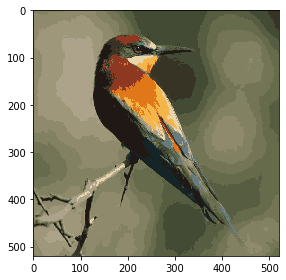

In [12]:
image_compressed = io.imread('img_test_new.png')
io.imshow(image_compressed)
io.show()

In [14]:
info = os.stat('img_test.png')
print("size of image before running K-mean algorithm: ",info.st_size/1024,"KB")
info = os.stat('img_test_new.png')
print("size of image after running K-mean algorithm: ",info.st_size/1024,"KB")

size of image before running K-mean algorithm:  187.5205078125 KB
size of image after running K-mean algorithm:  46.44140625 KB
